In [1]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [3]:
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 5

In [5]:
with open("G:/Acads/Real Time Signal Processing Lab/fer2013/fer2013.csv") as f:
    content = f.readlines()

In [6]:
lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [8]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

In [9]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [10]:
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [11]:
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

In [12]:
model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

In [13]:
fit = True

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
	model.load_weights('facial_expression_model_weights.h5') #load weights

Epoch 1/5
256/256 [==============================] - 612s 2s/step - loss: 1.7599 - acc: 0.2781
Epoch 2/5
256/256 [==============================] - 674s 3s/step - loss: 1.5355 - acc: 0.3981
Epoch 3/5
256/256 [==============================] - 639s 2s/step - loss: 1.3827 - acc: 0.4655
Epoch 4/5
256/256 [==============================] - 691s 3s/step - loss: 1.2711 - acc: 0.5125
Epoch 5/5
256/256 [==============================] - 556s 2s/step - loss: 1.2004 - acc: 0.5411


In [14]:
from keras.models import load_model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [15]:
#overall evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

3589/3589 [==============================] - 10s 3ms/step
Test loss: 1.2168915788919423
Test accuracy: 53.88687656811931


In [16]:
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()


[0.12473927 0.00378021 0.1344224  0.4373591  0.17218448 0.05793897
 0.0695755 ]
[0. 0. 1. 0. 0. 0. 0.]


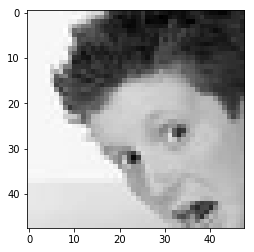

[0.12473927 0.00378021 0.1344224  0.4373591  0.17218448 0.05793897
 0.0695755 ]


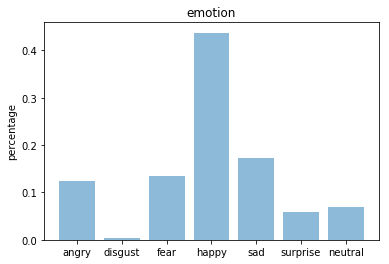

----------------------------------------------
[0.01851954 0.00235432 0.04341934 0.00174508 0.00227166 0.9301331
 0.00155698]
[0. 0. 0. 0. 0. 1. 0.]


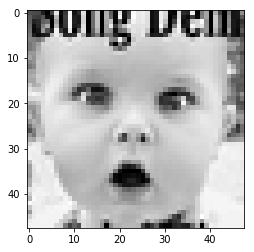

[0.01851954 0.00235432 0.04341934 0.00174508 0.00227166 0.9301331
 0.00155698]


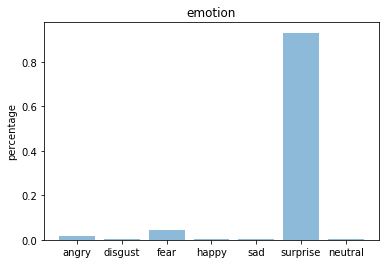

----------------------------------------------
[0.22967257 0.0179693  0.19063655 0.03514551 0.37328312 0.00417365
 0.14911929]
[1. 0. 0. 0. 0. 0. 0.]


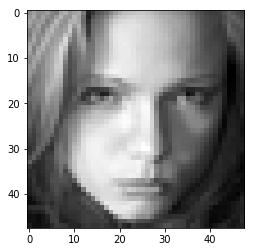

[0.22967257 0.0179693  0.19063655 0.03514551 0.37328312 0.00417365
 0.14911929]


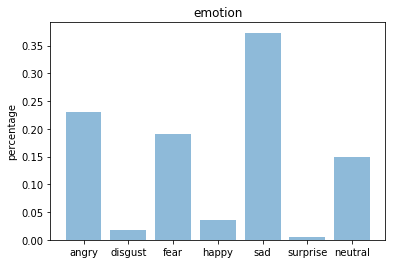

----------------------------------------------
[0.04303066 0.00194406 0.1808887  0.11035232 0.4729218  0.01661446
 0.17424797]
[0. 0. 0. 0. 1. 0. 0.]


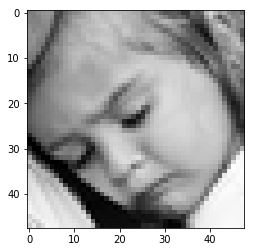

[0.04303066 0.00194406 0.1808887  0.11035232 0.4729218  0.01661446
 0.17424797]


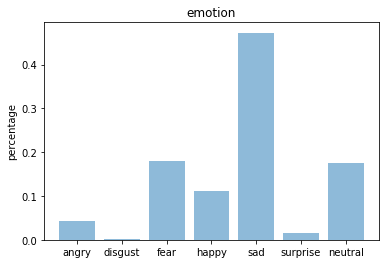

----------------------------------------------
[0.36967137 0.05293118 0.08297922 0.23649669 0.15422224 0.00483215
 0.0988671 ]
[1. 0. 0. 0. 0. 0. 0.]


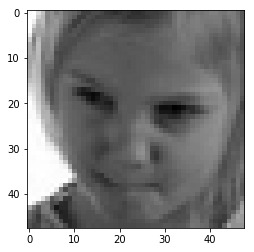

[0.36967137 0.05293118 0.08297922 0.23649669 0.15422224 0.00483215
 0.0988671 ]


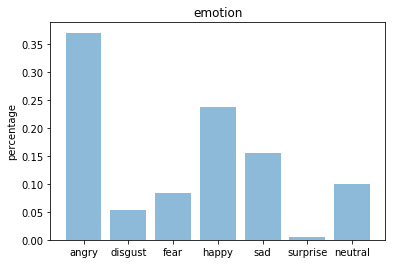

----------------------------------------------
[0.11303565 0.00678238 0.11716945 0.03772398 0.2782951  0.00821726
 0.43877622]
[0. 0. 1. 0. 0. 0. 0.]


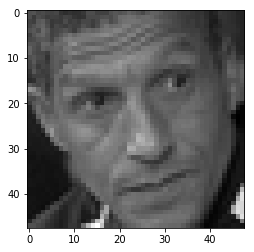

[0.11303565 0.00678238 0.11716945 0.03772398 0.2782951  0.00821726
 0.43877622]


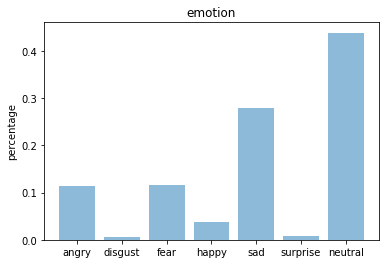

----------------------------------------------
[0.05683026 0.01386503 0.13861729 0.1361838  0.5627054  0.00239314
 0.08940509]
[0. 0. 0. 0. 1. 0. 0.]


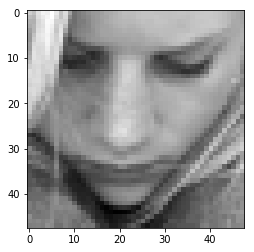

[0.05683026 0.01386503 0.13861729 0.1361838  0.5627054  0.00239314
 0.08940509]


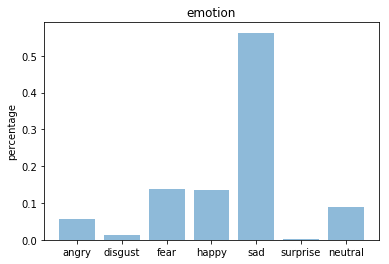

----------------------------------------------
[0.06779636 0.00112375 0.11888243 0.2583708  0.29878876 0.01687499
 0.2381629 ]
[0. 0. 0. 0. 1. 0. 0.]


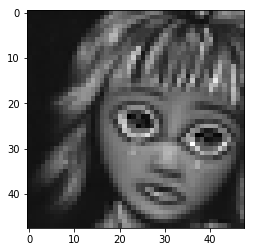

[0.06779636 0.00112375 0.11888243 0.2583708  0.29878876 0.01687499
 0.2381629 ]


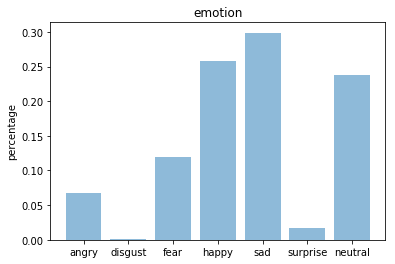

----------------------------------------------
[0.46147227 0.01353616 0.10205253 0.00803138 0.01332957 0.39566517
 0.00591291]
[1. 0. 0. 0. 0. 0. 0.]


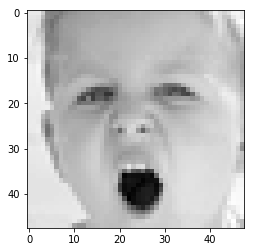

[0.46147227 0.01353616 0.10205253 0.00803138 0.01332957 0.39566517
 0.00591291]


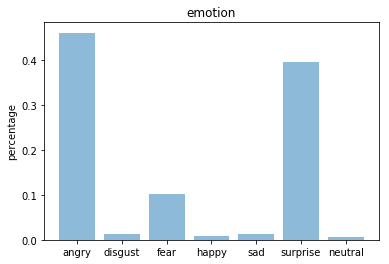

----------------------------------------------
[2.4621408e-03 4.4479495e-04 1.3453822e-01 1.6568508e-03 2.9367472e-03
 8.5677260e-01 1.1886978e-03]
[0. 0. 1. 0. 0. 0. 0.]


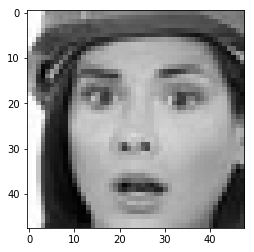

[2.4621408e-03 4.4479495e-04 1.3453822e-01 1.6568508e-03 2.9367472e-03
 8.5677260e-01 1.1886978e-03]


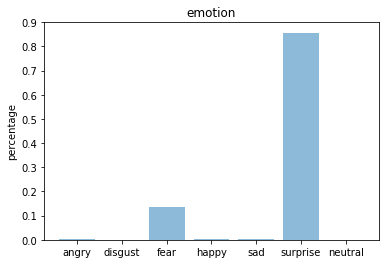

----------------------------------------------


In [19]:
monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			print(i) #predicted scores
			print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1